# play around with alibaba data

In [1]:
import matplotlib.pyplot as plt

In [2]:
import json
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


# List of filenames
filenames = [
    'rd_threepio.categories.json',
    'rd_threepio.brackets.json',
    'rd_threepio.cities.json',
    'rd_threepio.countries.json',
    'rd_threepio.discounts.json',
    'rd_threepio.attributes.json',
    'rd_threepio.likes.json',
    'rd_threepio.pois.json',
    'rd_threepio.reviews.json',
    'rd_threepio.replies.json',
    'rd_threepio.tags.json',
    'rd_threepio.homes.json',
    'rd_threepio.landing_pages.json',
    'rd_threepio.wishlists.json',
    'rd_threepio.languages.json',
    'rd_threepio.plan_tags.json',
    'rd_threepio.provinces.json',
    'rd_threepio.reply_likes.json'
]

# Dictionary to store the loaded JSON data
data = {}

# Loop through the filenames and load the JSON data
for filename in filenames:
    with open(filename) as f:
        key = filename.split('.')[1]  # Extract the key from the filename for example  
        data[key] = json.load(f)

# Access the data using the keys
categories = data['categories']
brackets = data['brackets']
cities = data['cities']
countries = data['countries']
discount = data['discounts']
attributes = data['attributes']
likes = data['likes']
pois = data['pois']
reviews = data['reviews']
replies = data['replies']
tags = data['tags']
homes = data['homes']
landing_pages = data['landing_pages']
wishlists = data['wishlists']
languages = data['languages']
plan_tags = data['plan_tags']
provinces = data['provinces']
reply_likes = data['reply_likes']

# we only need the pois and cities and categories dataframes for now!

In [4]:
# List of filenames and corresponding keys
file_keys = [
    'categories', 'brackets', 'cities', 'countries', 'discount', 'attributes', 
    'likes', 'pois', 'reviews', 'replies', 'tags', 'homes', 'landing_pages', 
    'wishlists', 'languages', 'plan_tags', 'provinces', 'reply_likes'
]

# List of data
files = [categories, brackets, cities, countries, discount, attributes, likes, pois, reviews, replies, tags, homes, landing_pages, wishlists, languages, plan_tags, provinces, reply_likes]

# Convert the list of files to DataFrames and store them in a dictionary
files_dict = {key: pd.DataFrame(data) for key, data in zip(file_keys, files)}



In [5]:
brackets_df = files_dict['brackets']
brackets_df['_id'] = brackets_df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
brackets_df['_id'] = brackets_df['_id'].apply(lambda x: x['$date'] if isinstance(x, dict) and '$date' in x else x)



In [6]:
def shorten_cities(df): #df=cities
    
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id','slug']
    df = df[columns_to_keep]

    # Convert '_id' from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    #rows to keep : df['slug']== 'isfahan-city' or df['slug']=='tabriz-city' or df['slug']=='shiraz-city' or df['slug']=='mashhad-city'
    # rows_to_keep = ['isfahan-city', 'tabriz-city', 'shiraz-city', 'mashhad-city']
    # df = df[df['slug'].isin(rows_to_keep)]


    return df

cities_df_raw = files_dict['cities']

cities_df = shorten_cities(cities_df_raw)
cities_df

,_id,slug
0,61409a04f24eeee04882db8c,rasht-city
1,6140a4235c49bb986631011b,isfahan-city
2,6140a4862dc2260e43ffa306,tabriz-city
3,6140a4bd2dc2260e43ffa307,shiraz-city
4,6140a5085c49bb986631011c,mashhad-city
...,...,...
333,63babecd11b9238d7f28a307,hamidia-city
334,63babed74e017f391964a6bc,kangavar-city
335,63babee9e154f3f05fe6fd8f,shahrebabak-city
336,63babefa4e017f391964a6bd,susangerd-city


In [7]:
def shorten_categories(df): #df=categories
    
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id','name', 'slug']
    df = df[columns_to_keep]

    # Convert '_id' from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    return df

categories_df_raw = files_dict['categories']

categories_df = shorten_categories(categories_df_raw)
categories_df




,_id,name,slug
0,612b815e2d28e7b40b49ae84,خورد و خوراک,food
1,612b815e2d28e7b40b49ae85,رستوران,restaurant
2,612b815e2d28e7b40b49ae89,کافه,cafe
3,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar
4,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,attractions
5,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions
6,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
7,612b815e2d28e7b40b49aea1,جاذبه‌ی تفریحی,entertainment
8,612b815e2d28e7b40b49aeae,مراکز فرهنگی,Cultural_centers
9,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping


In [8]:

def shorten_pois(df, cities_df, categories_df): #df=pois, cities_df=shortened df of cities
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id', 'city_id', 'name','slug', 'location', 'category_id', 'open_hours', 'ratings'] #maybe add 'parent_category_ids'
    df = df[columns_to_keep]
    
    # Convert from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    df['city_id'] = df['city_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    df['category_id'] = df['category_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    #df['parent_category_ids'] = df['parent_category_ids'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    
    # use cities_df to replace city_id with city slug and if city_id is not in cities_df, delete that row
    df = df.merge(cities_df, left_on='city_id', right_on = '_id', how='inner', suffixes=('', '_city')) #suffixes=('', '_city') to avoid duplicate columns 
    #merge the categories_df to replace category_id with category name
    df = df.merge(categories_df, left_on='category_id', right_on = '_id', how='inner', suffixes=('', '_category')) #suffixes=('', '_category') to avoid duplicate columns
    #drop city_id and category_id columns
    df.drop(['city_id', 'category_id'], axis=1, inplace=True) 


    #reorder the columns (final_columns_to_keep)
    #final_columns_to_keep = ['poi_id', 'name', 'city', 'location', 'category_id', 'open_hours', 'ratings', 'parent_category_ids']
    #df = df[final_columns_to_keep]

    return df


# Shorten the 'pois' DataFrame
pois_df = files_dict['pois']
pois_df = shorten_pois(pois_df, cities_df, categories_df)
pois_df.head()



,_id,name,slug,location,open_hours,ratings,_id_city,slug_city,_id_category,name_category,slug_category
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"{'type': 'Point', 'coordinates': [29.6147702, ...",[],"{'average': 4.8, 'count': 20, 'specifics': {'1...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
1,614edf99a5e04db3e9ed4f09,هتل کاوه,kaveh-hotel-isfahan,"{'type': 'Point', 'coordinates': [32.7014818, ...","[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...","{'average': 3.5, 'count': 6, 'specifics': {'1'...",6140a4235c49bb986631011b,isfahan-city,612b815e2d28e7b40b49aeb8,هتل,Hotel
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"{'type': 'Point', 'coordinates': [29.6360623, ...","[{'start': {'hour': 8, 'min': 0}, 'end': {'hou...","{'average': 4.925925925925926, 'count': 27, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"{'type': 'Point', 'coordinates': [29.610914, 5...",[],"{'average': 4.454545454545454, 'count': 11, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"{'type': 'Point', 'coordinates': [29.5925335, ...","[{'start': {'hour': 8, 'min': 0}, 'end': {'hou...","{'average': 4.454545454545454, 'count': 11, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeae,مراکز فرهنگی,Cultural_centers


In [9]:
# check if the is a location in the pois_df that is not a dictionary
pois_df['location'].apply(lambda x: type(x) != dict).sum()

# check if the type of the location is not a 'Point'
pois_df['location'].apply(lambda x: x['type'] != 'Point').sum()

#check if the coordinates is not a list and the length of the list is not 2
pois_df['location'].apply(lambda x: type(x['coordinates']) != list or len(x['coordinates']) != 2).sum()


0

In [10]:
# def a fuction that replace the 'location' column to the 'coordinates' column for the eas of use: location_to_coordinates(df)
def location_to_coordinates(df):
    df['coordinates'] = df['location'].apply(lambda x: x['coordinates'])
    df.drop('location', axis=1, inplace=True)
    return df

pois_df=location_to_coordinates(pois_df)


# add a column for the first element of coordinates and also the second element of coordinates
pois_df['longitude'] = pois_df['coordinates'].apply(lambda x: x[0])
pois_df['latitude'] = pois_df['coordinates'].apply(lambda x: x[1])


def dist(poi_1,poi_2):
    poi1 = pois_df[pois_df['_id']==poi_1]
    poi2 = pois_df[pois_df['_id']==poi_2]
    return ((poi1['coordinates'].iloc[0][0]-poi2['coordinates'].iloc[0][0])**2 + (poi1['coordinates'].iloc[0][1]-poi2['coordinates'].iloc[0][1])**2)**0.5




In [11]:

# def a function that convert the ratings column (dictionary with 3 keys) to  3 columns: 'average_rating', 'rating_count', 'rating_specifics',
def ratings_to_columns(df):
    df['average_rating'] = df['ratings'].apply(lambda x: x['average'])
    df['rating_count'] = df['ratings'].apply(lambda x: x['count'])
    df['rating_specifics'] = df['ratings'].apply(lambda x: x['specifics'])
    df.drop('ratings', axis=1, inplace=True)
    return df

pois_df = ratings_to_columns(pois_df)



In [12]:
pois_df.loc[pois_df['slug_category'].isin(['restaurant', 'cafe']), '_id_category'] = '612b815e2d28e7b40b49ae84'
pois_df.loc[pois_df['slug_category'].isin(['restaurant', 'cafe']), 'name_category'] = 'خورد و خوراک'
pois_df.loc[pois_df['slug_category'].isin(['restaurant', 'cafe']), 'slug_category'] = 'food'

pois_df.loc[pois_df['slug_category'].isin(['urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), '_id_category'] = '612b815e2d28e7b40b49ae8f'
pois_df.loc[pois_df['slug_category'].isin([ 'urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), 'name_category'] = 'جاذبه‌های گردشگری'
pois_df.loc[pois_df['slug_category'].isin([ 'urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), 'slug_category'] = 'urban_attractions'

pois_df.loc[pois_df['slug_category'].isin(['Shopping_centers', 'shops']), '_id_category'] = '612b815e2d28e7b40b49aeb4'
pois_df.loc[pois_df['slug_category'].isin(['Shopping_centers', 'shops']), 'name_category'] = 'بازار و خرید'
pois_df.loc[pois_df['slug_category'].isin(['Shopping_centers', 'shops']), 'slug_category'] = 'shopping'

pois_df['slug_category'].unique()





array(['urban_attractions', 'Hotel', 'natural_attractions', 'shopping',
       'food'], dtype=object)

In [13]:
pois_df['slug_category'].unique()

array(['urban_attractions', 'Hotel', 'natural_attractions', 'shopping',
       'food'], dtype=object)

In [14]:
''' if the data of open hours exist change the structure of the open hours (from a dictionary) to a list of 2 values: open and close (minutes from midnight)
 if the data of open hours does not exist, fill it with [0,0]

 the structure for  shiraz_city_pois_attraction['open_hours'].iloc[1] is like below: 
 
[{'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'saturday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'sunday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'monday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'tuesday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'wednesday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'thursday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'friday'}]

  take the first element of the list and from this dictionary extract the 'start' key and from the 'start' key extract the 'hour' and 'min' keys and convert them to minutes from midnight
    do the same for the 'end' key == replace the whole with a list of 2 values: open and close (minutes from midnight)
    if the open hours was an empty list, fill it with [0,0]
'''

def open_hours_to_minutes(df):
    df['open_hours'] = df['open_hours'].apply(lambda x: [0,0] if len(x)==0 else [x[0]['start']['hour']*60+x[0]['start']['min'], x[0]['end']['hour']*60+x[0]['end']['min']])
    return df

pois_df = open_hours_to_minutes(pois_df)

pois_df


,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,longitude,latitude,average_rating,rating_count,rating_specifics
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6147702, 52.5452266]",29.614770,52.545227,4.800000,20,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 17}"
1,614edf99a5e04db3e9ed4f09,هتل کاوه,kaveh-hotel-isfahan,"[0, 0]",6140a4235c49bb986631011b,isfahan-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[32.7014818, 51.6757002]",32.701482,51.675700,3.500000,6,"{'1': 0, '2': 0, '3': 3, '4': 3, '5': 0}"
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"[480, 1230]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6360623, 52.5251428]",29.636062,52.525143,4.925926,27,"{'1': 0, '2': 0, '3': 0, '4': 2, '5': 25}"
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.610914, 52.5408433]",29.610914,52.540843,4.454545,11,"{'1': 0, '2': 0, '3': 1, '4': 4, '5': 6}"
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"[480, 840]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5925335, 52.5721767]",29.592533,52.572177,4.454545,11,"{'1': 0, '2': 1, '3': 1, '4': 1, '5': 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,63c643a290953b45674ac37c,مسجد معتمدالدوله,motamed-al-doleh-mosque-kermanshah,"[600, 960]",6394799b352329265936b1b7,kermanshah-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[34.3167671, 47.0731535]",34.316767,47.073153,3.000000,1,"{'1': 0, '2': 0, '3': 1, '4': 0, '5': 0}"
3174,63c6536b45c4aea36f194fc6,رستوران بین المللی شهسواری,shahsavari-cafe-resraurant-tabriz,"[600, 1380]",6140a4862dc2260e43ffa306,tabriz-city,612b815e2d28e7b40b49ae84,خورد و خوراک,food,"[38.065778383031756, 46.32746761818608]",38.065778,46.327468,5.000000,5,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 5}"
3175,63cb9e0245c4aea36f1950d3,رستوران ایتالیایی پادنا,italian-restaurant-padena-kermanshah,"[1095, 1380]",6394799b352329265936b1b7,kermanshah-city,612b815e2d28e7b40b49ae84,خورد و خوراک,food,"[34.2917644, 47.0484396]",34.291764,47.048440,3.333333,3,"{'1': 0, '2': 0, '3': 2, '4': 1, '5': 0}"
3176,63cba78245c4aea36f1950d4,کافه کتاب ۵ عصر,5-asr-book-cafe-kermanshah,"[600, 1380]",6394799b352329265936b1b7,kermanshah-city,612b815e2d28e7b40b49ae84,خورد و خوراک,food,"[34.2991252, 47.0579242]",34.299125,47.057924,5.000000,2,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 2}"


In [15]:
# now if the second element of the open hours is less than the first element, add 25*60 to the second element
def fix_open_hours(df):
    df['open_hours'] = df['open_hours'].apply(lambda x: [x[0], x[1]+25*60] if x[1]<x[0] else x)
    #also if the open hours is [0,0] fill it with [480, 1320] (8:00 to 22:00)
    #df['open_hours'] = df['open_hours'].apply(lambda x: [480, 1320] if x==[0,0] else x)
    #or delete where x==[0,0]:
    #df = df[df['open_hours'].apply(lambda x: x!=[0,0])]
    return df

pois_df = fix_open_hours(pois_df)
pois_df

#how many of th open hours are empty like [0,0]
print(pois_df['open_hours'].apply(lambda x: x==[0,0]).sum())
len(pois_df)


1094


3178

In [16]:
# add a column as 'spending_time' to the shiraz_city_pois_attraction_modified_OH dataframe. simply add a cosntant number regarding the categories
# 'food' : 60 minutes
# 'urban_attractions' : 120 minutes
# 'natural_attractions' : 120 minutes
# 'shopping' : 180 minutes

def add_spending_time(df):
    df['spending_time'] = df['slug_category'].apply(lambda x: 60 if x=='food' else 120 if x=='urban_attractions' or x=='natural_attractions' else 180)
    return df

pois_df = add_spending_time(pois_df)


In [17]:
# seperate the open hours to 2 columns: open and close
pois_df['open_time'] = pois_df['open_hours'].apply(lambda x: x[0])
pois_df['close_time'] = pois_df['open_hours'].apply(lambda x: x[1])


In [18]:
pois_df.head()

,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,longitude,latitude,average_rating,rating_count,rating_specifics,spending_time,open_time,close_time
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6147702, 52.5452266]",29.614770,52.545227,4.800000,20,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 17}",120,0,0
1,614edf99a5e04db3e9ed4f09,هتل کاوه,kaveh-hotel-isfahan,"[0, 0]",6140a4235c49bb986631011b,isfahan-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[32.7014818, 51.6757002]",32.701482,51.675700,3.500000,6,"{'1': 0, '2': 0, '3': 3, '4': 3, '5': 0}",180,0,0
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"[480, 1230]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6360623, 52.5251428]",29.636062,52.525143,4.925926,27,"{'1': 0, '2': 0, '3': 0, '4': 2, '5': 25}",120,480,1230
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.610914, 52.5408433]",29.610914,52.540843,4.454545,11,"{'1': 0, '2': 0, '3': 1, '4': 4, '5': 6}",120,0,0
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"[480, 840]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5925335, 52.5721767]",29.592533,52.572177,4.454545,11,"{'1': 0, '2': 1, '3': 1, '4': 1, '5': 8}",120,480,840


In [19]:

pois_df.to_csv('pois_df.csv', index=False) #index false mean 



In [20]:
def split_pois_df(pois_df):

    hotel_category = ['612b815e2d28e7b40b49aeb7', '612b815e2d28e7b40b49aeb8', '612b815e2d28e7b40b49aeb9', '612b815e2d28e7b40b49aeba', '612b815e2d28e7b40b49aebb']
    pois_df_hotel = pois_df[pois_df['_id_category'].isin(hotel_category)]
    pois_df_attraction = pois_df[~pois_df['_id_category'].isin(hotel_category)]
    return pois_df_hotel, pois_df_attraction

pois_df_hotel, pois_df_attraction = split_pois_df(pois_df)

In [21]:
# keep the columns that are needed: 'slug' 'name' 'coordinates' 'open_time' 'close_time' 'spending_time' 'slug_category' 
pois_short = pois_df_attraction[['slug', 'longitude',	'latitude' , 'open_time', 'close_time', 'spending_time', 'slug_category', 'average_rating', 'slug_city']]

# change the 'slug' column name to 'name'
pois_short.rename(columns={'slug':'name'}, inplace=True)

# reindex and drop the old index and also csv the file
pois_short.reset_index(drop=True, inplace=True)






C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\2840523176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pois_short.rename(columns={'slug':'name'}, inplace=True)


### first approach

C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\318925768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\318925768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows

Filtered DataFrame:
['food' 'shopping' 'urban_attractions' 'natural_attractions']
371 356


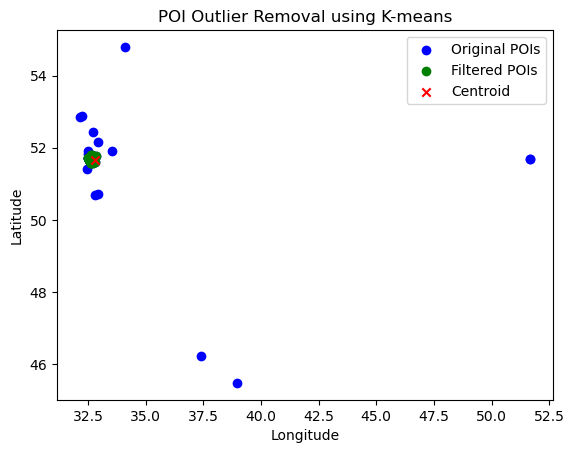

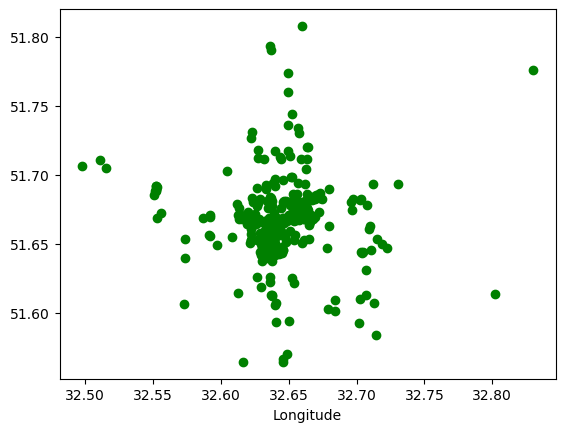

In [22]:

city_pois=pois_df_attraction.loc[pois_df['slug_city']=='isfahan-city']


city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])

# Create a new DataFrame for clustering
poi_array = city_pois[['latitude', 'longitude']].values

# Apply K-means clustering with 1 cluster (main city cluster)
kmeans = KMeans(n_clusters=1)
kmeans.fit(poi_array)

# Find the centroid of the POIs
centroid = kmeans.cluster_centers_ 

# Calculate the distance of each POI from the centroid
distances = np.linalg.norm(poi_array - centroid, axis=1) 



# Calculate the mean and standard deviation of the distances
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Set threshold as a multiple of the standard deviation above the mean
threshold = mean_distance 
#  + 2 * std_distance 
#  2 standard deviations above the mean

# Filter POIs that are within the threshold distance from the centroid
city_pois['distance_from_centroid'] = distances
filtered_city_pois = city_pois[city_pois['distance_from_centroid'] <= threshold]


# Print the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_city_pois['slug_category'].unique())
print(len(city_pois), len(filtered_city_pois))
# Optional: Plot the original and filtered POIs for visualization
plt.scatter(city_pois['longitude'], city_pois['latitude'], color='blue', label='Original POIs')
plt.scatter(filtered_city_pois['longitude'], filtered_city_pois['latitude'], color='green', label='Filtered POIs')
plt.scatter(centroid[:, 1], centroid[:, 0], color='red', label='Centroid', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('POI Outlier Removal using K-means')
plt.show()


#plot only the filtered pois
plt.scatter(filtered_city_pois['longitude'], filtered_city_pois['latitude'], color='green', label='Filtered POIs')
plt.xlabel('Longitude')
plt.show()

### second approch

In [23]:
from sklearn.cluster import DBSCAN

C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\431981236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\431981236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])
C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\431981236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

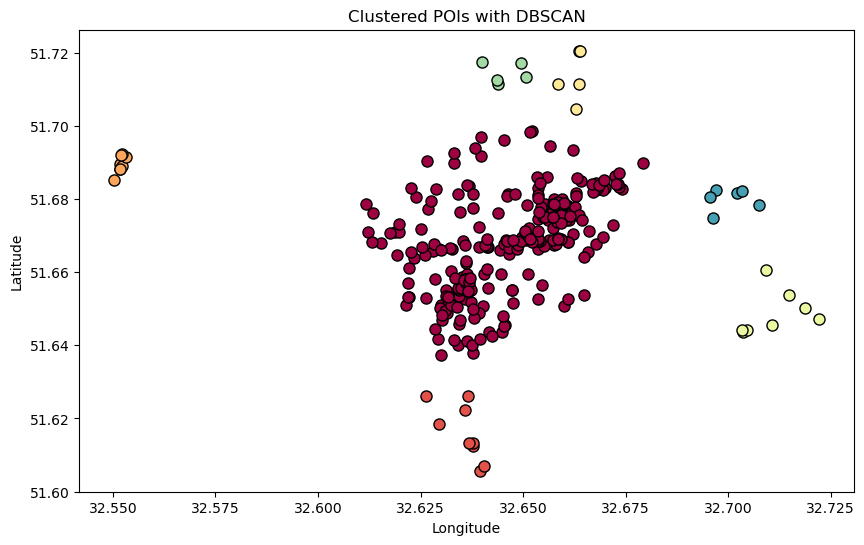

In [24]:
city_pois=pois_df_attraction.loc[pois_df['slug_city']=='isfahan-city']

# Assuming city_pois is your DataFrame and coordinates are stored as tuples or lists in the 'coordinates' column
city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])

# Convert POIs to a NumPy array for clustering
poi_array = city_pois[['latitude', 'longitude']].values

# Apply DBSCAN
# eps is the maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust these parameters based on your dataset # e means the distance between the points that
city_pois['cluster'] = dbscan.fit_predict(poi_array)

# Plot the clustering result
plt.figure(figsize=(10, 6))
unique_labels = set(city_pois['cluster'])

# Colors mapped to each cluster label
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
 
for k, col in zip(unique_labels, colors):
    class_member_mask = (city_pois['cluster'] == k)
    xy = poi_array[class_member_mask]
    if k == -1:
        # Black used for noise (outliers), with smaller marker size.
        pass
        #plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=2)
    else:
        # Normal marker size for cluster members
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

plt.title('Clustered POIs with DBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [25]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

In [26]:
all_cities= cities_df['slug'].unique()
print(len(all_cities)) #but it is fake! because some of the cities are not in the pois_df

# create list of cities:

cities = ['isfahan-city', 'mashhad-city', 'tabriz-city', 'shiraz-city', 'kish-island', 'ahvaz-city', 'yazd-city', 'rasht-city', 'qeshm-island', 'bandarabbas-city', 'gorgan-city', 'kermanshah-city', 'bushehr-city', 'chabahar-city']


338


In [27]:
for city in cities:
    #smae as example above but instead of showing them, same their images in a folder
    city_pois=pois_df_attraction.loc[pois_df_attraction['slug_city']==city]
    city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
    city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])
    poi_array = city_pois[['latitude', 'longitude']].values
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(poi_array)
    centroid = kmeans.cluster_centers_
    distances = np.linalg.norm(poi_array - centroid, axis=1)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    threshold = mean_distance
    city_pois['distance_from_centroid'] = distances
    filtered_city_pois = city_pois[city_pois['distance_from_centroid'] <= threshold]
    #filtered_city_pois.to_csv(f'{city}_pois.csv', index=False)


    plt.scatter(city_pois['longitude'], city_pois['latitude'], color='blue', label='Original POIs')
    plt.scatter(filtered_city_pois['longitude'], filtered_city_pois['latitude'], color='green', label='Filtered POIs')
    plt.scatter(centroid[:, 1], centroid[:, 0], color='red', label='Centroid', marker='x')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    #title base on the city
    plt.title(f'{city} POI Outlier Removal using K-means')
    plt.savefig(f'images/{city}_wholistic.png')
    plt.close()
    

    plt.scatter(filtered_city_pois['longitude'], filtered_city_pois['latitude'], color='green', label='Filtered POIs')
    plt.title(f'{city} filterned POIs using K-means')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(f'images/{city}_just_filtered.png')
    plt.close()

    # Apply DBSCAN
    # eps is the maximum distance between two samples for them to be considered as in the same neighborhood
    # min_samples is the number of samples in a neighborhood for a point to be considered as a core point
    dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust these parameters based on your dataset 
    city_pois['cluster'] = dbscan.fit_predict(poi_array)

    # Plot the clustering result
    plt.figure(figsize=(10, 6))
    unique_labels = set(city_pois['cluster'])

    # Colors mapped to each cluster label
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        class_member_mask = (city_pois['cluster'] == k)
        xy = poi_array[class_member_mask]
        if k == -1:
            # Black used for noise (outliers), with smaller marker size.
            pass
            #plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=2)
        else:
            # Normal marker size for cluster members
            plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    plt.title('Clustered POIs with DBSCAN')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(f'images/{city}_clustered_DBSCAN.png')
    plt.close()




C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\1501898593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['longitude'] = city_pois['coordinates'].apply(lambda x: x[0])
C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_14552\1501898593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_pois['latitude'] = city_pois['coordinates'].apply(lambda x: x[1])
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windo

In [30]:
city_pois

,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,longitude,latitude,average_rating,rating_count,rating_specifics,spending_time,open_time,close_time,distance_from_centroid,cluster
2711,634157271fb91cb1c47fd158,کوه های مریخی,martian-mountains-chabahar,"[0, 0]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions,"[25.2763301, 60.9589716]",25.276330,60.958972,4.789474,19,"{'1': 0, '2': 0, '3': 0, '4': 4, '5': 15}",120,0,0,0.314106,-1
2712,6341602dec8d0707ce4bd7f3,ساحل صخره ای,rocky-beach-chabahar,"[0, 0]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions,"[25.2763414, 60.6707368]",25.276341,60.670737,4.800000,5,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 4}",120,0,0,0.049726,-1
2714,63416c7aec8d0707ce4bd7f7,قلعه تیس (قلعه پرتغالی ها),tis-castle-chabahar,"[0, 0]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[25.3542088, 60.6073372]",25.354209,60.607337,4.500000,6,"{'1': 0, '2': 0, '3': 1, '4': 1, '5': 4}",120,0,0,0.052775,2
2715,634176dbec8d0707ce4bd7f8,ساحل مکران,makran-beach-chabahar,"[0, 0]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions,"[25.302296, 60.62726333]",25.302296,60.627263,5.000000,5,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 5}",120,0,0,0.027632,0
2717,634269b8ec8d0707ce4bd805,کلبه غواصی,diving-cottage-chabahar,"[510, 1020]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[25.2938027, 60.6208215]",25.293803,60.620821,4.600000,10,"{'1': 0, '2': 0, '3': 2, '4': 0, '5': 8}",120,510,1020,0.038139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,637a046d9497b6d8ea2596b9,کافه قهوه بلوچستان,balouchistan-coffee-cafe-chabahar,"[600, 1500]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae84,خورد و خوراک,food,"[25.2854421, 60.6611736]",25.285442,60.661174,5.000000,1,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 1}",60,600,1500,0.037511,0
2852,637c84a09497b6d8ea2596ed,کافه تایم چابهار,cafe-time_chabahar,"[480, 1500]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae84,خورد و خوراک,food,"[25.3212985, 60.6366641]",25.321299,60.636664,5.000000,2,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 2}",60,480,1500,0.011356,1
2855,637df6b79497b6d8ea259798,فواره بلوچستان,baluchestan-fountain-hole-chabahar,"[0, 0]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions,"[25.2788248, 60.6719085]",25.278825,60.671909,4.750000,4,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 3}",120,0,0,0.048102,-1
2897,638d90f93d0c4ae38e3cdfc5,مرکز خرید الماس,almas-shopping-mall-chabahar,"[540, 1350]",63411ee4ec8d0707ce4bd7e8,chabahar-city,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping,"[25.3210244, 60.6328105]",25.321024,60.632810,5.000000,3,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 3}",180,540,1350,0.015193,1
